## PUBG Data Analysis with Python

<img src="https://pmcvariety.files.wordpress.com/2018/04/pubg.jpg?w=1000&h=563&crop=1" alt="PUBG" style="width: 750px;"/>

This kernel features:
- [The Killers](#The-Killers)
- [The Runners](#The-Runners)
- [The Drivers](#The-Drivers)
- [The Swimmers](#The-Swimmers)
- [The Healers](#The-Healers)
- [Solos, Duos and Squads](#Solos,-Duos-and-Squads)
- [Correlation](#Pearson-correlation-between-variables)
- [Feature Engineering](#Feature-Engineering)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('train_V2.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35347 entries, 0 to 35346
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               35347 non-null  object 
 1   groupId          35347 non-null  object 
 2   matchId          35347 non-null  object 
 3   assists          35347 non-null  int64  
 4   boosts           35347 non-null  int64  
 5   damageDealt      35347 non-null  float64
 6   DBNOs            35347 non-null  int64  
 7   headshotKills    35347 non-null  int64  
 8   heals            35347 non-null  int64  
 9   killPlace        35347 non-null  int64  
 10  killPoints       35347 non-null  int64  
 11  kills            35347 non-null  int64  
 12  killStreaks      35347 non-null  int64  
 13  longestKill      35347 non-null  float64
 14  matchDuration    35347 non-null  int64  
 15  matchType        35347 non-null  object 
 16  maxPlace         35347 non-null  int64  
 17  numGroups   

- **groupId** - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **matchId** - Integer ID to identify match. There are no matches that are in both the training and testing set.
- **assists** - Number of enemy players this player damaged that were killed by teammates.
- **boosts** - Number of boost items used.
- **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
- **DBNOs** - Number of enemy players knocked.
- **headshotKills** - Number of enemy players killed with headshots.
- **heals** - Number of healing items used.
- **killPlace** - Ranking in match of number of enemy players killed.
- **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- **kills** - Number of enemy players killed.
- **killStreaks** - Max number of enemy players killed in a short amount of time.
- **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **numGroups** - Number of groups we have data for in the match.
- **revives** - Number of times this player revived teammates.
- **rideDistance** - Total distance traveled in vehicles measured in meters.
- **roadKills** - Number of kills while in a vehicle.
- **swimDistance** - Total distance traveled by swimming measured in meters.
- **teamKills** - Number of times this player killed a teammate.
- **vehicleDestroys** - Number of vehicles destroyed.
- **walkDistance** - Total distance traveled on foot measured in meters.
- **weaponsAcquired** - Number of weapons picked up.
- **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
- **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [ ]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [ ]:
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
35342,131331ed50ccf8,3022b6c7c6553a,f93090bf7fda56,0,3,532.80,3,1,6,5,0,6,2,15.09,1372,duo,50,48,1500,1,0.0,0.0,0.0,0.0,0.0,1088.00,4.0,0.0,0.6939
35343,240acb9206bb6b,02092cfd7ab55a,e7d6acf956c0c2,0,0,0.00,0,0,0,72,1196,0,0,0.00,1904,duo-fpp,49,48,-1,0,0.0,0.0,0.0,0.0,0.0,67.81,2.0,1455.0,0.3125
35344,e8e3f48fbc63d8,37fcaffa79dd9f,ce55814cb1f686,1,5,474.90,1,1,3,10,0,3,1,203.90,1963,squad-fpp,28,27,1562,0,4801.0,0.0,0.0,0.0,0.0,1673.00,5.0,0.0,1.0000
35345,2d0573b2299b14,a347e16d4908db,75fd2ebe1c0cdb,0,1,0.00,0,0,1,58,1070,0,0,0.00,1382,duo,49,47,-1,0,0.0,0.0,0.0,0.0,0.0,100.00,2.0,1430.0,0.5000
35346,85bd8488811247,de04bda94fde7f,415bb071fa0ac1,2,0,66.35,1,0,1,54,1370,0,0,0.00,1408,squad-fpp,31,30,-1,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok, now that we have a glimpse of the data, let's explore them.

## The Killers

<img src="https://i.ytimg.com/vi/rnAeX795Jn0/maxresdefault.jpg" alt="The Killers" style="width: 700px;"/>

In [ ]:
print("The average person kills {:.4f} players".format(train['kills'].mean()))

The average person kills 0.9231 players


In [ ]:
print( "99% of people have {} kills or less".format(train['kills'].quantile(0.99)))

99% of people have 7.0 kills or less


In [ ]:
print( "The most kills ever recorded is {}.".format(train['kills'].max()))

The most kills ever recorded is 24.


Let's plot the kill counts.

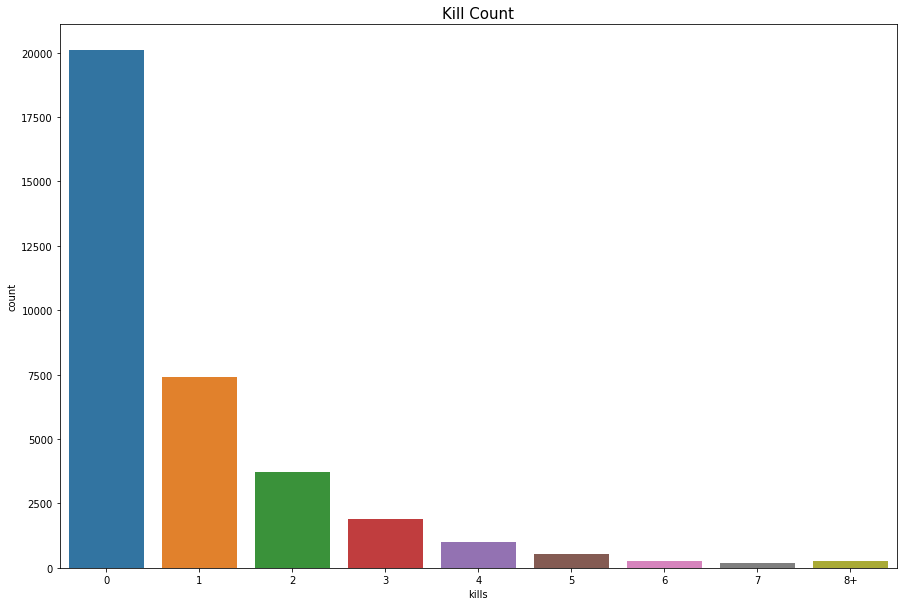

In [ ]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

Most people can't make a single kill. At least do they do damage?

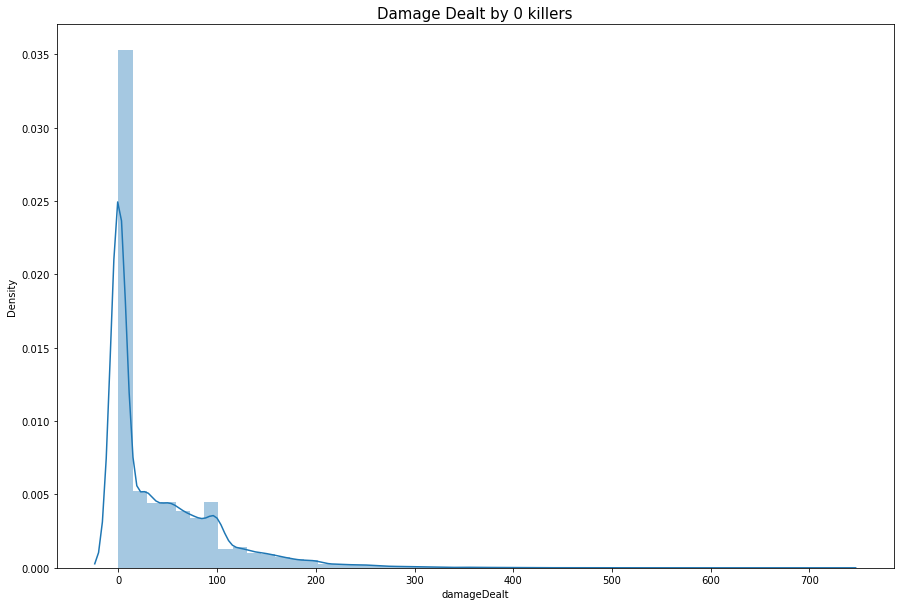

In [ ]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

Well, most of them don't. Let's investigate the exceptions.

In [ ]:
print("{} players have won without a single kill!".format(len(data[data['winPlacePerc']==1])))

157 players have won without a single kill!


In [ ]:
data1 = train[train['damageDealt'] == 0].copy()
print("{} players have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1])))

43 players have won without dealing damage!


Plot win placement percentage vs kills.

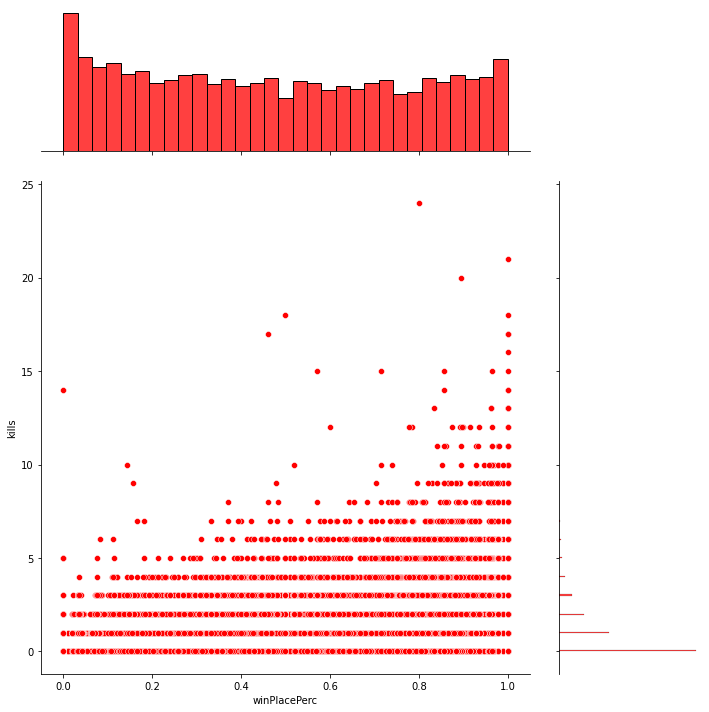

In [ ]:
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, ratio=3, color="r")
plt.show()

Apparentrly killing has a correlation with winning. Finally let's group players based on kills (0 kills, 1-2 kills, 3-5 kills, 6-10 kills and 10+ kills).

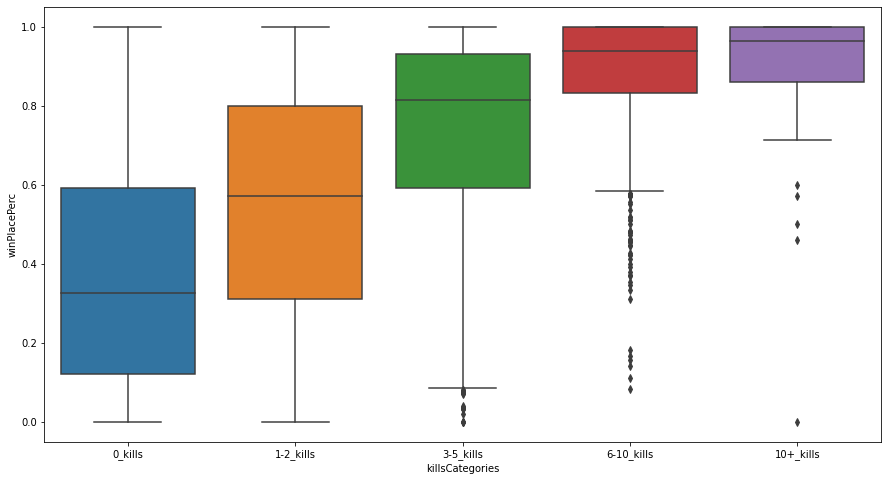

In [ ]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], 
                                  [-1, 0, 2, 5, 10, 60], 
                                  labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

## The Runners

<img src="https://steemitimages.com/DQmRmYLRxu1vUhVtnFAA6bHFbShtr7Wdv1wLrPjdxbRZsjc/maxresdefault%20(2).jpg" alt="The Runners" style="width: 700px;"/>

In [ ]:
print("The average person walks for {:.1f}m.".format(train['walkDistance'].mean()))

The average person walks for 1159.2m.


In [ ]:
print("99% of people have walked {}m or less.".format(train['walkDistance'].quantile(0.99), ))

99% of people have walked 4398.650000000009m or less.


In [ ]:
print("The marathoner champion walked for {}m.".format(train['walkDistance'].max()))

The marathoner champion walked for 13530.0m.


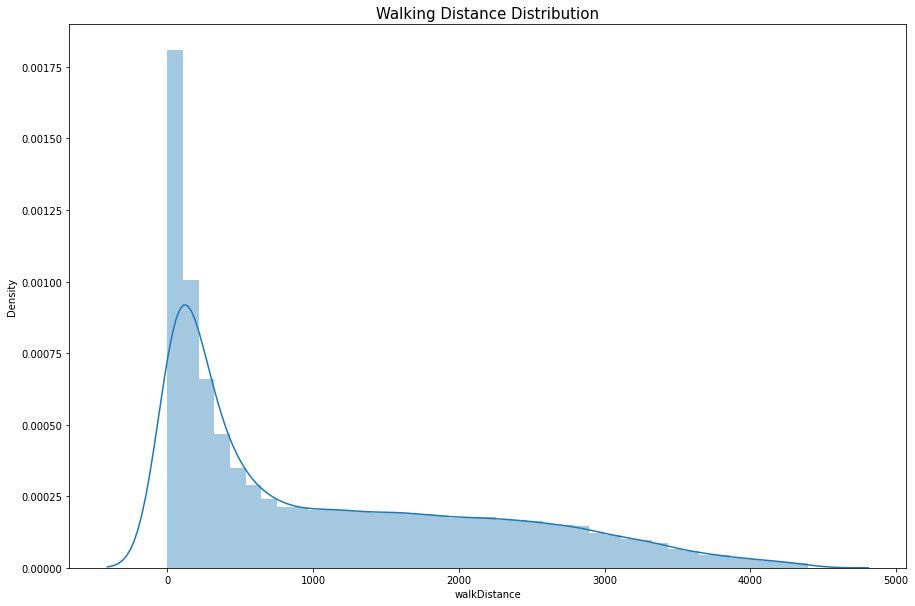

In [ ]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [ ]:
print("{} players walked 0 meters. ".format(len(data[data['walkDistance'] == 0])))
print("This means that they die before even taking a step.")

803 players walked 0 meters. 
This means that they die before even taking a step.


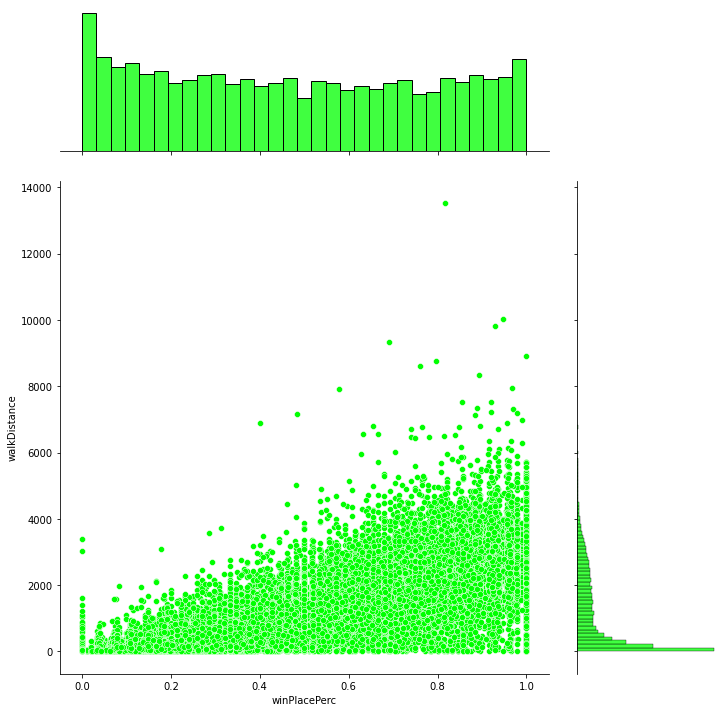

In [ ]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="lime")
plt.show()

Apparently walking has a high correlation with winPlacePerc.

## The Drivers

<img src="http://cdn.gamer-network.net/2018/metabomb/pubghowtodrivecarsandbikes.jpg" alt="The Drivers" style="width: 700px;"/>

In [ ]:
print("The average person drives for {:.1f}m.".format(train['rideDistance'].mean()))
print("99% of people have drived {}m or less.".format(train['rideDistance'].quantile(0.99)))
print("The formula 1 champion drived for {}m.".format(train['rideDistance'].max()))

The average person drives for 609.1m.
99% of people have drived 6981.780000000006m or less.
The formula 1 champion drived for 25930.0m.


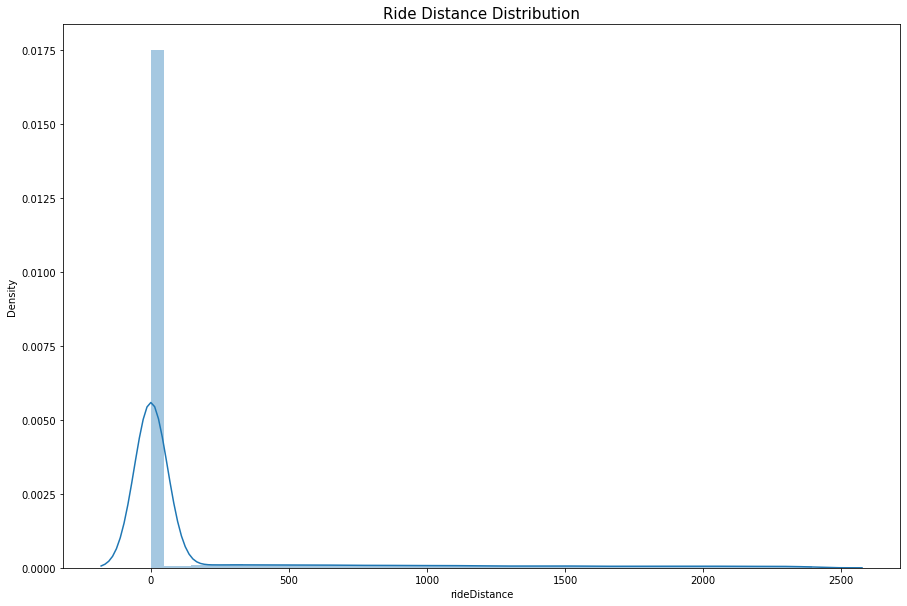

In [ ]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [ ]:
print("{} players drived for 0 meters. ".format(len(data[data['rideDistance'] == 0])))

26304 players drived for 0 meters. 


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f09fa829dd0> (for post_execute):


KeyboardInterrupt: ignored

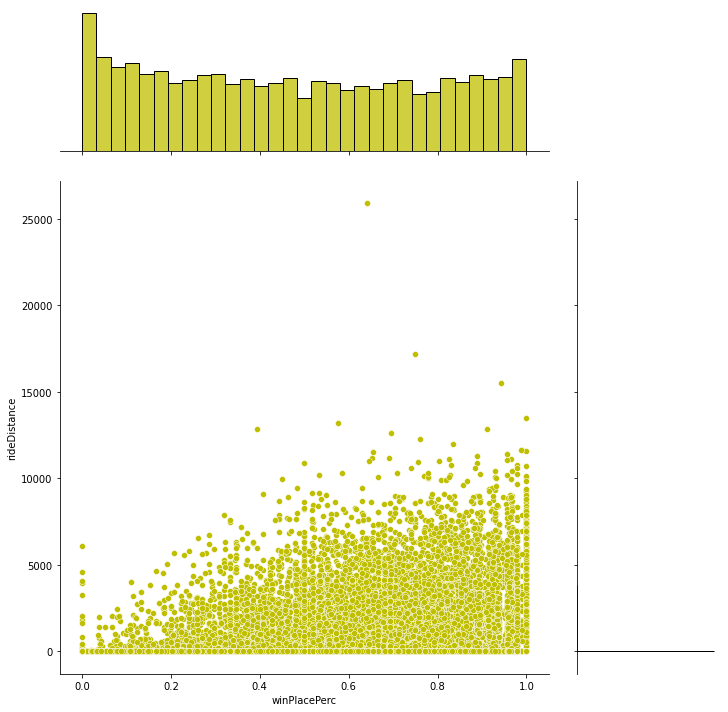

In [ ]:
#sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color="y")
#plt.show()

There is a small correlation between rideDistance and winPlacePerc.

Destroying a vehicle in my experience shows that a player has skills. Let's check it.

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

My experience was correct. Destroying a single vehicle increases your chances of winning!

## The Swimmers

<img src="https://i.ytimg.com/vi/tQxzsE0DijQ/maxresdefault.jpg" alt="The Swimmers" style="width: 700px;"/>

In [ ]:
print("The average person swims for {:.1f}m.".format(train['swimDistance'].mean()))
print("99% of people have swimemd {}m or less.".format(train['swimDistance'].quantile(0.99)))
print("The olympic champion swimmed for {}m.".format(train['swimDistance'].max()))

The average person swims for 4.5m.
99% of people have swimemd 123.0m or less.
The olympic champion swimmed for 3823.0m.


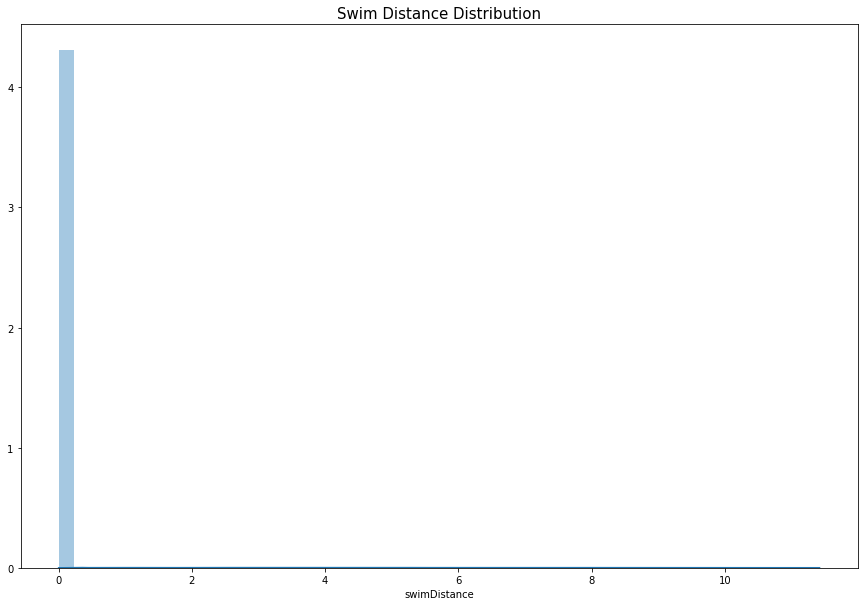

In [ ]:
data = train.copy()
data = data[data['swimDistance'] < train['swimDistance'].quantile(0.95)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'])
plt.show()

Almost no one swims. Let's group the swimming distances in 4 categories and plot vs winPlacePerc.

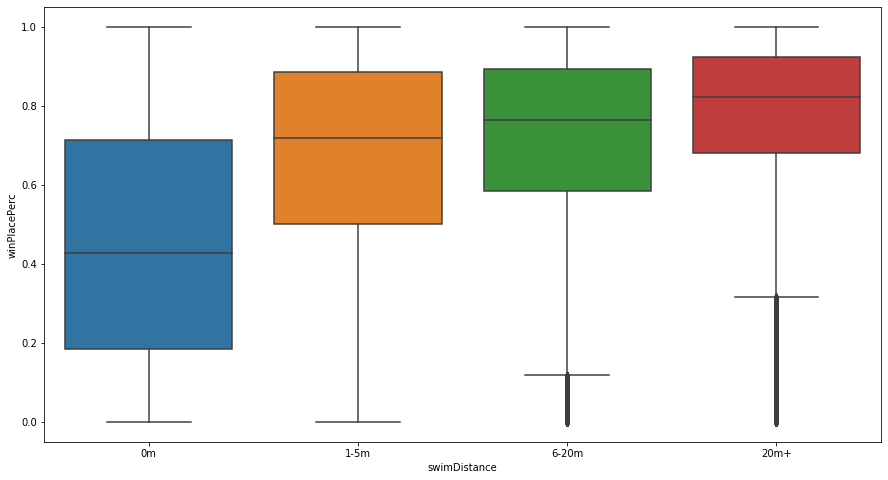

In [ ]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], 
                              [-1, 0, 5, 20, 5286], 
                              labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

It seems that if you swim, you rise to the top. In PUBG there are currently 3 maps. One of them has almost no water. Keep that in mind. I might plan on doing analysis to find out in which map a match is played.

## The Healers

<img src="https://i.ytimg.com/vi/xfI9XljX51k/maxresdefault.jpg" alt="The Healers" style="width: 700px;"/>

In [ ]:
print("The average person uses {:.1f} heal items.".format(train['heals'].mean()))
print("99% of people use {} or less heals.".format(train['heals'].quantile(0.99)))
print("The max heals used {}.".format(train['heals'].max()))

The average person uses 1.4 heal items.
99% of people use 12.0 or less heals.
The max heals used 80.


In [ ]:
print("The average person uses {:.1f} boosts items.".format(train['boosts'].mean()))
print("99% of people use {} or less boosts.".format(train['boosts'].quantile(0.99)))
print("The max boosts used {}.".format(train['boosts'].max()))

The average person uses 1.1 boosts items.
99% of people use 7.0 or less boosts.
The max boosts used 33.


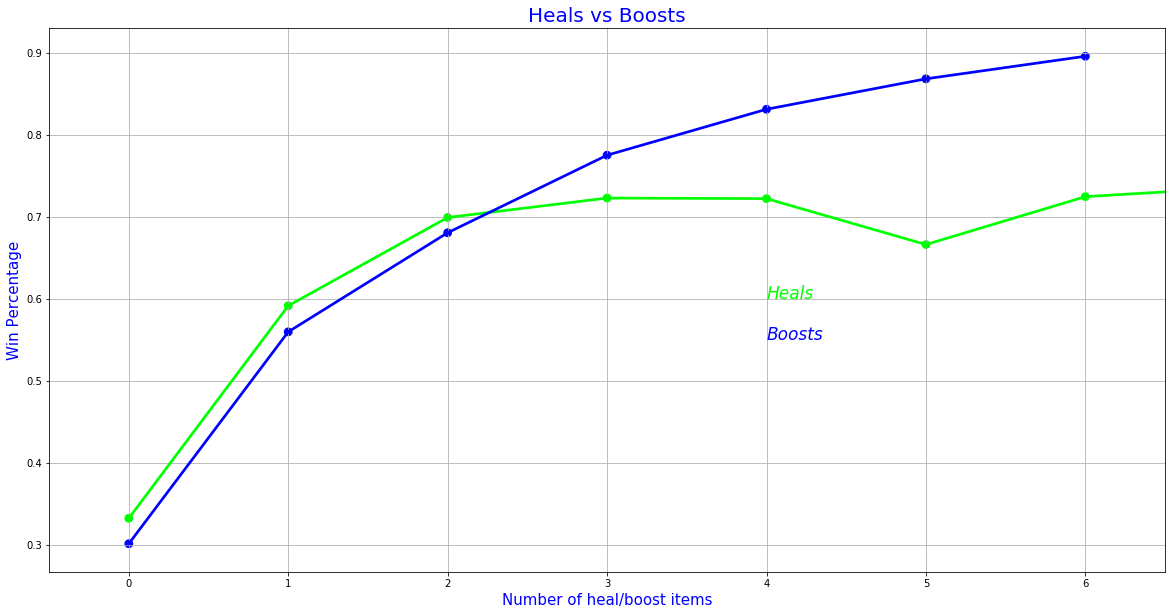

In [ ]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

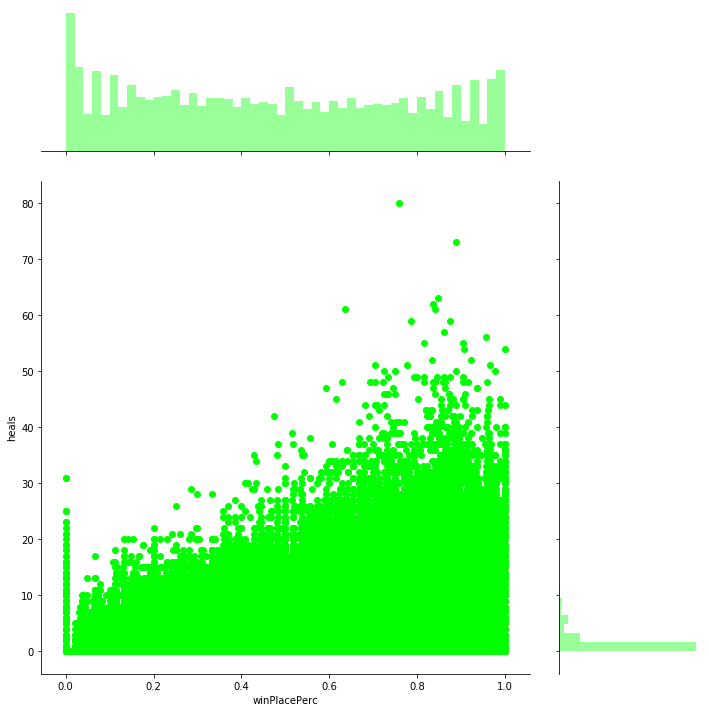

In [ ]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")
plt.show()

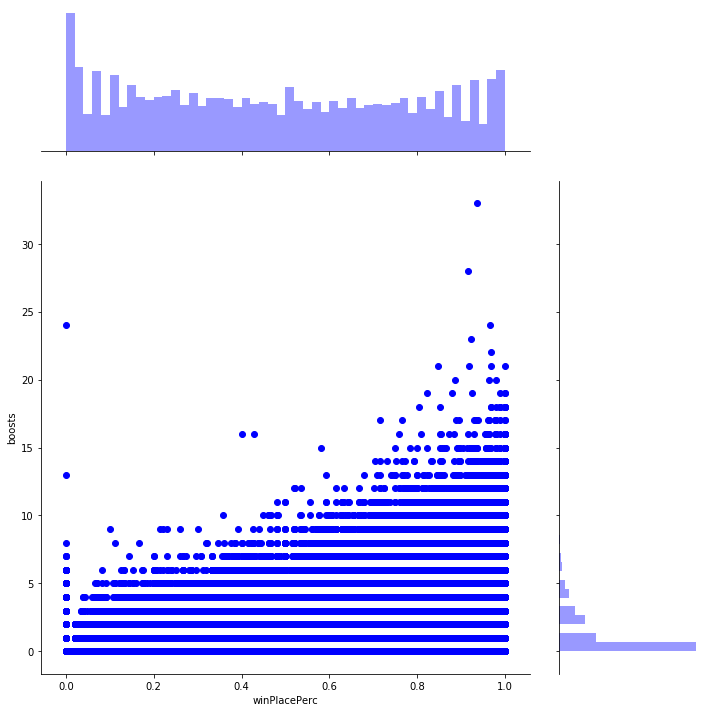

In [ ]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")
plt.show()

So healing and boosting, definitely are correlated with winPlacePerc. Boosting is more.

In every plot, there is an abnormal behavior when values are 0.

## Solos, Duos and Squads

There are 3 game modes in the game. One can play solo, or with a friend (duo), or with 3 other friends (squad). 100 players join the same server, so in the case of duos the max teams are 50 and in the case of squads the max teams are 25. 

In [ ]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]

In [ ]:
print("There are {} ({:.2f}%) solo games.".format(len(solos), 100*len(solos)/len(train)))
print("There are {} ({:.2f}%) duo games.".format(len(duos), 100*len(duos)/len(train)))
print("There are {} ({:.2f}%) squad games.".format( len(squads), 100*len(squads)/len(train)))

There are 709111 (15.95%) solo games.
There are 3295326 (74.10%) duo games.
There are 442529 (9.95%) squad games.


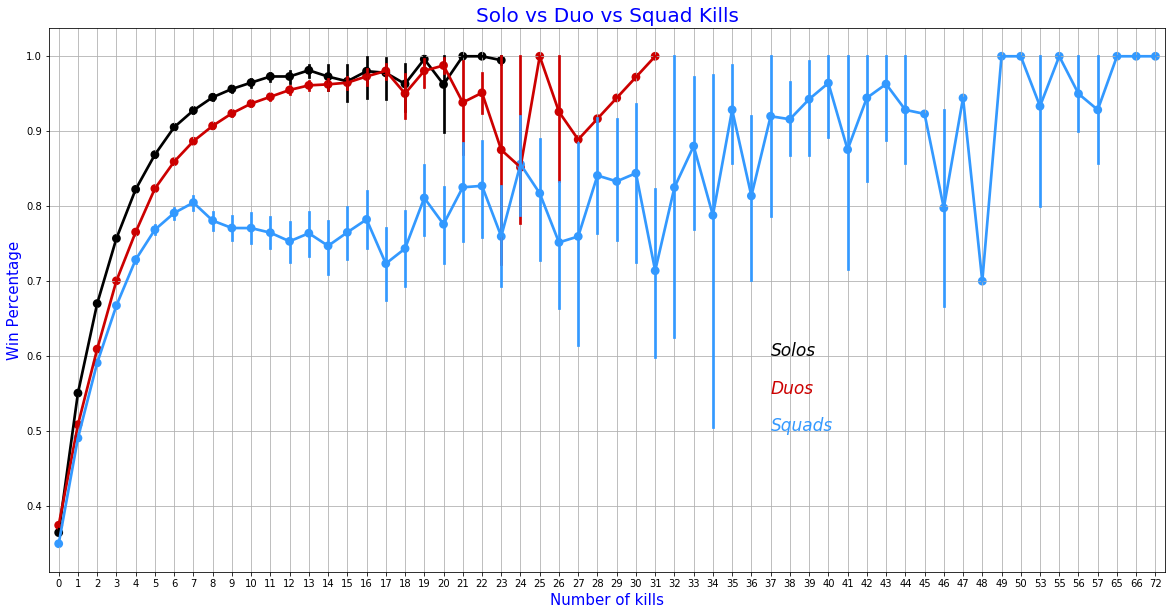

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

Hmm, very interesting. Solos and duos behave the same, but when playing squads kills don't matter that much.

The attribute DBNOs means enemy players knocked. A "knock" can happen only in duos or squads, because the teammates have the chance to "revive" the knocked player in a given time. So a knocked player can be revived or die. If he is revived, the next time he will be knocked, his teammates will have less time to revive him.

The attribute assist can also happen only in duos or squads. It generally means that the player had an involvement in a kill.

The attribute revive also happens in duos or squads.

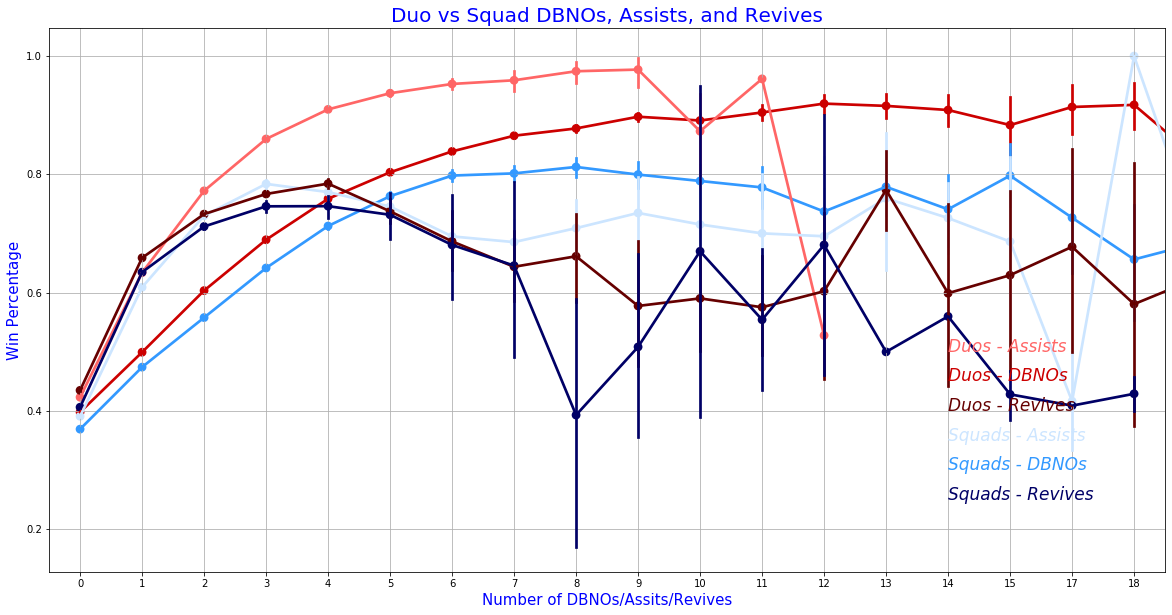

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF6666',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#000066',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='#FF6666',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Squads - Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()

## Pearson correlation between variables

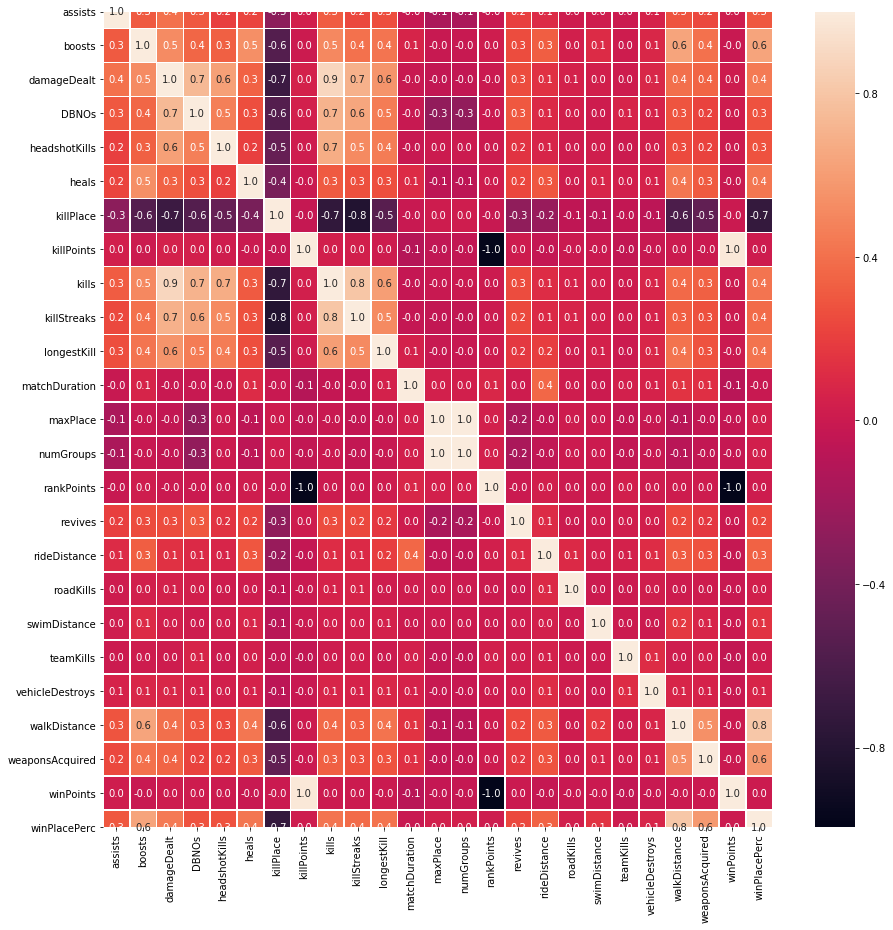

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In terms of the target variable (winPlacePerc), there are a few variables high medium to high correlation. The highest positive correlation is walkDistance and the highest negative the killPlace.

**Let's zoom to the top-5 most positive correlated variables with the target.**

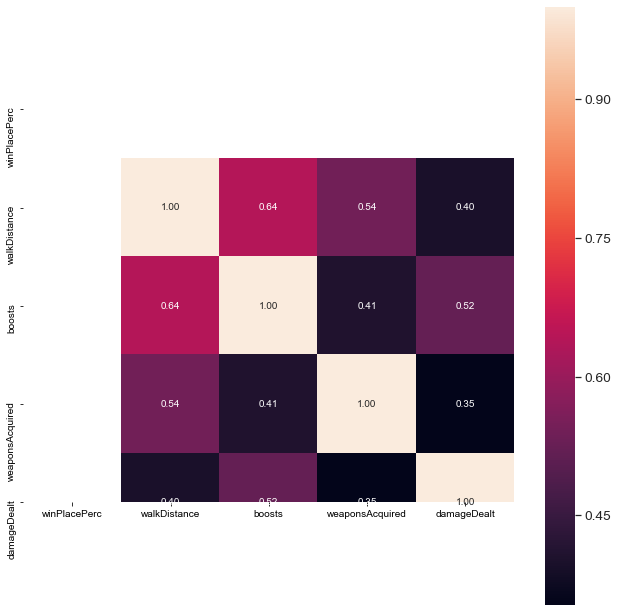

In [ ]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Let's plot the above variables and the killPlace variable as pairs.

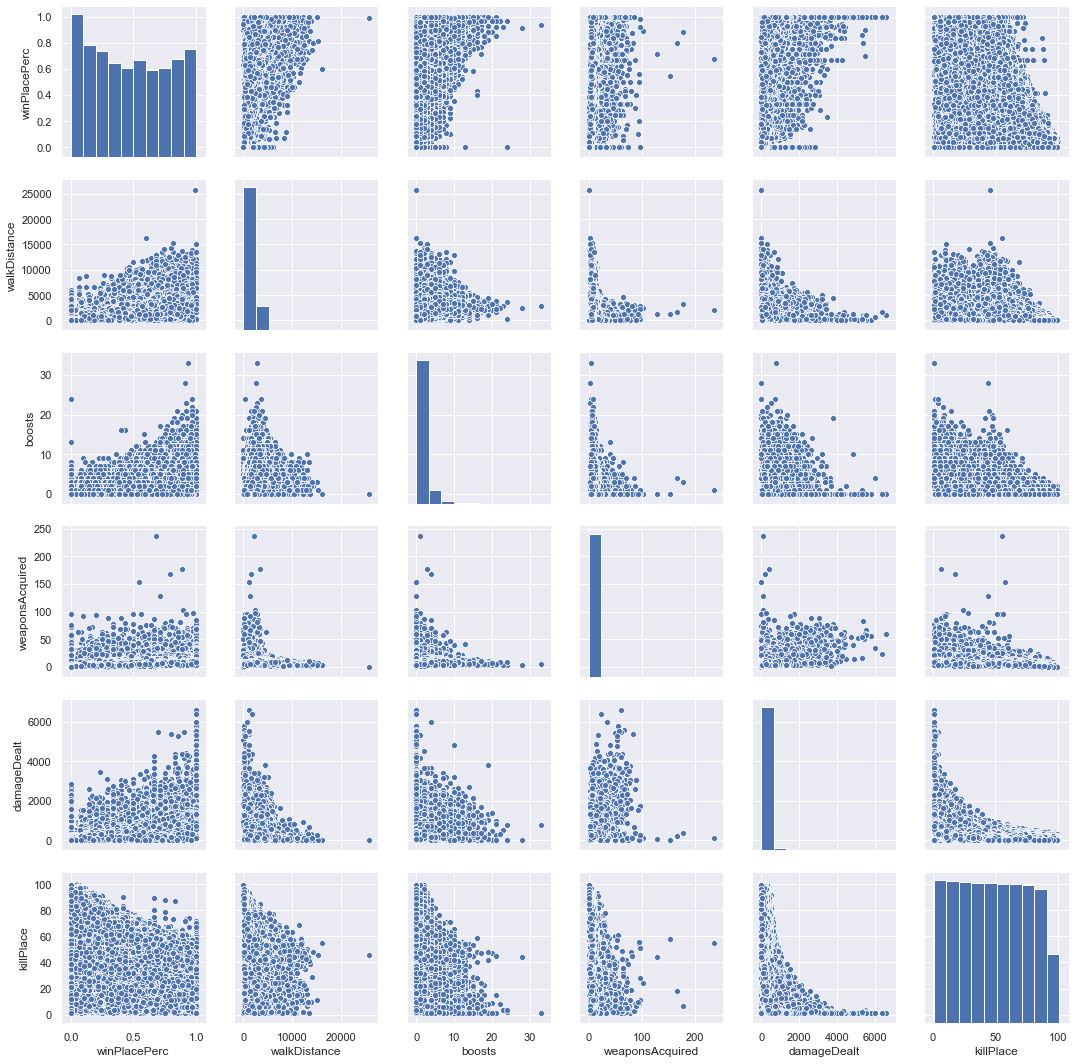

In [ ]:
sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sns.pairplot(train[cols], size = 2.5)
plt.show()

## Feature Engineering

A game in PUBG can have up to 100 players fighting each other. But most of the times a game isn't "full". There is no variable that gives us the number of players joined. So lets create one.

In [ ]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')

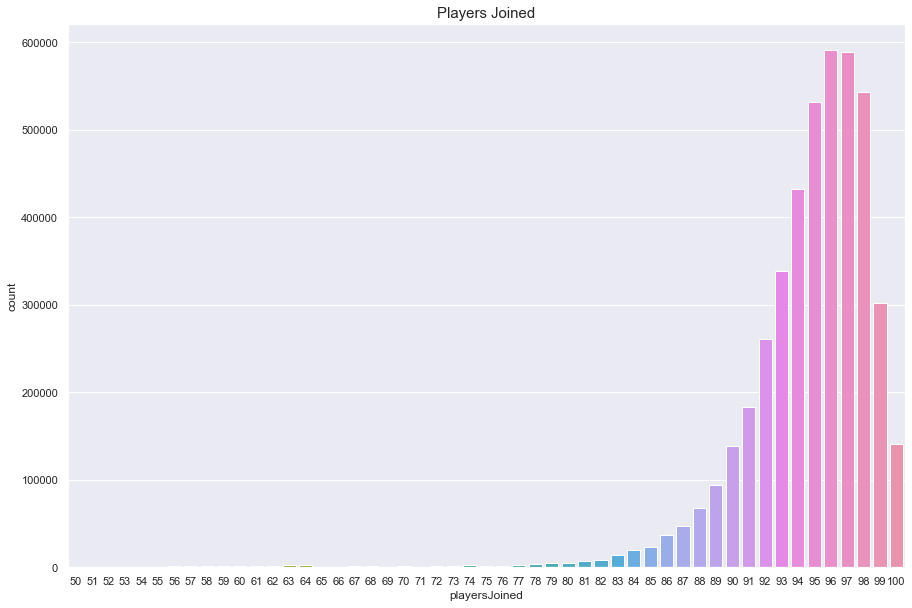

In [ ]:
data = train.copy()
data = data[data['playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

Based on the "playersJoined" feature we can create (or change) a lot of others to normalize their values. For example i will create the "killsNorm" and "damageDealtNorm" features. When there are 100 players in the game it might be easier to find and kill someone, than when there are 90 players. So i will normalize the kills in a way that a kill in 100 players will score 1 (as it is) and in 90 players it will score (100-90)/100 + 1 = 1.1. This is just an assumption. You can use different scales.

In [ ]:
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][5:8]

,playersJoined,kills,killsNorm,damageDealt,damageDealtNorm
5,95,1,1.05,100.000,105.00000
6,97,0,0.00,0.000,0.00000
7,96,0,0.00,8.538,8.87952


Another simple feature is the sum of heals and boosts. Also the sum of total distance travelled.

In [ ]:
train['healsAndBoosts'] = train['heals']+train['boosts']
train['totalDistance'] = train['walkDistance']+train['rideDistance']+train['swimDistance']

When using boosting items you run faster. They also help staying out of the zone (PUBG term) and loot more (meaning walking more). So lets create a feature boosts per walking distance. Heals don't make you run faster, but they also help staying out of the zone and loot more. So lets create the same feature for heals also.

In [ ]:
# The +1 is to avoid infinity, because there are entries where boosts>0 
# and walkDistance=0. Strange.
train['boostsPerWalkDistance'] = train['boosts']/(train['walkDistance']+1) 
train['boostsPerWalkDistance'].fillna(0, inplace=True)

# The +1 is to avoid infinity, because there are entries 
# where heals>0 and walkDistance=0. Strange.
train['healsPerWalkDistance'] = train['heals']/(train['walkDistance']+1) 
train['healsPerWalkDistance'].fillna(0, inplace=True)

#The +1 is to avoid infinity.
train['healsAndBoostsPerWalkDistance'] = train['healsAndBoosts']/(train['walkDistance']+1) 
train['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)

train[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']][40:45]

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsAndBoosts,healsAndBoostsPerWalkDistance
40,327.30,1,0.003046,1,0.003046,2,0.006092
41,128.80,0,0.000000,0,0.000000,0,0.000000
42,52.52,0,0.000000,0,0.000000,0,0.000000
43,534.10,1,0.001869,0,0.000000,1,0.001869
44,2576.00,4,0.001552,6,0.002328,10,0.003880


Same, let's create the feature "killsPerWalkDistance".

In [ ]:
# The +1 is to avoid infinity, because there are entries 
# where kills>0 and walkDistance=0. Strange.
train['killsPerWalkDistance'] = train['kills']/(train['walkDistance']+1) 
train['killsPerWalkDistance'].fillna(0, inplace=True)

train[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance', 'winPlacePerc']].sort_values(by='killsPerWalkDistance').tail(10)

,kills,walkDistance,rideDistance,killsPerWalkDistance,winPlacePerc
4115816,29,0.0,0.0,29.0,0.7500
3083358,30,0.0,0.0,30.0,0.7500
422093,30,0.0,0.0,30.0,1.0000
2394021,31,0.0,0.0,31.0,0.5385
3057746,31,0.0,0.0,31.0,0.7500
2998470,35,0.0,0.0,35.0,1.0000
1158891,36,0.0,0.0,36.0,0.5833
3062788,36,0.0,0.0,36.0,0.8667
1068513,38,0.0,0.0,38.0,0.8333
1702541,43,0.0,0.0,43.0,1.0000


0 walking distance and many kills? Also most have winPlacePerc=1. Definitelly cheaters.

Earlier in the kernel we did EDA for Solos, Duos and Squads. Lets create a column for them.

In [ ]:
train['team'] = [1 if i>50 else 2 if (i>25 & i<=50) else 4 for i in train['numGroups']]

In [ ]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,playersJoined,killsNorm,damageDealtNorm,healsAndBoosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,killsPerWalkDistance,team
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,96,0.00,0.0000,0,244.8000,0.0,0.0,0.0,0.000000,2
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,91,0.00,99.7023,0,1445.0445,0.0,0.0,0.0,0.000000,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,98,0.00,69.3600,0,161.8000,0.0,0.0,0.0,0.000000,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,91,0.00,35.8610,0,202.7000,0.0,0.0,0.0,0.000000,2
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,97,1.03,103.0000,0,49.7500,0.0,0.0,0.0,0.019704,1


So we created 10 features. I hope some of them to be useful.